In [8]:
import os
os.listdir("/home/julian/data/expodata/loser/258_and_264.svx")

NotADirectoryError: [Errno 20] Not a directory: '/home/julian/data/expodata/loser/258_and_264.svx'

In [25]:
# following https://github.com/patrickbwarren/qgis-survex-import
import subprocess
subprocess.run(["cavern", "/home/julian/data/expodata/loser/258_and_264.svx", "--output=258_and_264.3d"])
subprocess.run(["cad3d", "258_and_264.3d"])
subprocess.run(["ogr2ogr", "-f" "ESRI Shapefile", "258_and_264.shp", "258_and_264.dxf", "-where", "Layer='CentreLine'", "-a_srs", "EPSG:32633"])

CompletedProcess(args=['ogr2ogr', '-fESRI Shapefile', '258_and_264.shp', '258_and_264.dxf', '-where', "Layer='CentreLine'", '-a_srs', 'EPSG:32633'], returncode=1)

In [35]:
x = subprocess.run(["ogr2ogr", "-f", "ESRI Shapefile", "258_and_264.shp", "258_and_264.dxf", "-where", "Layer='CentreLine'", "-a_srs", "EPSG:32633"], stdout=subprocess.PIPE)
print(x.stdout)

b''


In [39]:
import shapefile
sf = shapefile.Reader("258_and_264")
ss = sf.shapes()
len(ss), sf.bbox

(5609, [411054.05, 5282887.2, 412060.95, 5283606.75])

In [45]:
#https://github.com/GeospatialPython/pyshp#reading-shapefiles
k = sf.records()
len(k)

5609

In [59]:
ss = sf.shapeRecords()
s = ss[0]
s


In [53]:
s.shape.bbox

[411606.83, 5283396.61, 411614.58, 5283402.71]

In [61]:
# Aha!  we can get the zvalues out of the points
s.shape.z


[1816.68, 1816.34]

In [63]:
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import collections  as mc

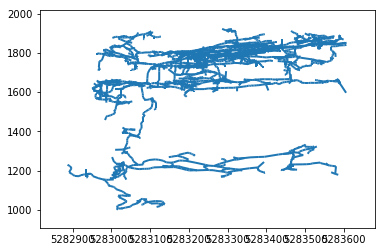

In [66]:
# prove we've got the lines by elevation
ss = sf.shapes()
lines = [ [(s.points[0][1], s.z[0]), (s.points[1][1], s.z[1])]  for s in ss ]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)


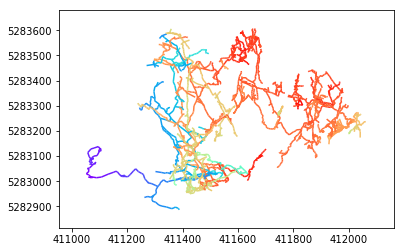

In [132]:
# proof we can get the lines out and colour them by z-depth
import matplotlib
lines = [ [(s.points[0][0], s.points[0][1]), (s.points[1][0], s.points[1][1])]  for s in ss ]

zmin = min(min(s.z[0], s.z[1])  for s in ss)
zmax = max(max(s.z[0], s.z[1])  for s in ss)
zs = [ (s.z[0]+s.z[1])/2  for s in ss ]
cm = matplotlib.cm.rainbow
lc = mc.LineCollection(lines, colors=[cm((z-zmin)/(zmax-zmin)) for z in zs])
fig, ax = plt.subplots()
ax.autoscale()
ax.add_collection(lc)
ax.margins(0.1)
norm = matplotlib.colors.Normalize(vmin=zmin, vmax=zmax)
# doesn't work as ax.axes is not updated for some reason
#matplotlib.colorbar.ColorbarBase(ax.axes, cmap=cm, norm=norm)  
